In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("MCSReal_Estate.csv")
df.head()

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Avg Area Comfort
0,0,79545.458574,missing,?,NaN,23086.800503,$1059033.5578701235,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",0.289937
1,1,79248.642455,6.0028998082752425,6.730821019094919,3.09,40173.072174,Rs112941818.61352125,"188 Johnson Views Suite 079\nLake Kathleen, CA...",NaN
2,2,61287.067179,5.865889840310001,8.512727430375099,5.13,36882.159400,$1058987.9878760849,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",NaN
3,3,63345.240046,7.1882360945186425,?,NaN,34310.242831,Rs94546260.4972085,USS Barnett\nFPO AP 44820,NaN
4,4,59982.197226,5.040554523106283,7.839387785120487,4.23,26354.109472,$630943.4893385402,USNS Raymond\nFPO AE 09386,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ids                           5000 non-null   int64  
 1   Avg. Area Income              5000 non-null   float64
 2   Avg. Area House Age           5000 non-null   object 
 3   Avg. Area Number of Rooms     5000 non-null   object 
 4   Avg. Area Number of Bedrooms  3333 non-null   float64
 5   Area Population               5000 non-null   float64
 6   Price                         5000 non-null   object 
 7   Address                       5000 non-null   object 
 8   Avg Area Comfort              200 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 351.7+ KB


Data has 5000 rows and 9 columns, most of the columns are in numeric in nature (i.r. int or float). Also there are object datatype which is arbitary datatype that represents collections. By observing data we can say there are some missing values in it.

In [5]:
df.describe()

,ids,Avg. Area Income,Avg. Area Number of Bedrooms,Area Population,Avg Area Comfort
count,5000.000000,5000.000000,3333.000000,5000.000000,200.000000
mean,2499.500000,68583.108984,3.998083,36163.516039,0.512601
std,1443.520003,10657.991214,1.239102,9925.650114,0.282111
min,0.000000,17796.631190,2.000000,172.610686,0.007437
25%,1249.750000,61480.562388,3.150000,29403.928702,0.260780
50%,2499.500000,68804.286404,4.050000,36199.406689,0.515369
75%,3749.250000,75783.338666,4.500000,42861.290769,0.766171
max,4999.000000,107701.748378,6.500000,69621.713378,0.991570


In [6]:
df["Price"] = df["Price"].str.replace("[$Rs]", "")

In [7]:
df["Price"] = df["Price"].astype("float64")

In [8]:
df["Price"]

0       1.059034e+06
1       1.129418e+08
2       1.058988e+06
3       9.454626e+07
4       6.309435e+05
            ...     
4995    7.951453e+07
4996    1.482618e+06
4997    7.730472e+07
4998    1.198657e+06
4999    9.742129e+07
Name: Price, Length: 5000, dtype: float64

In [9]:
price = []

for i, p in df[["Price"]].itertuples():
  if(i%2==0):
    price.append(p)
  else:
    price.append(p/75)

In [10]:
df["Price"]=price

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ids                           5000 non-null   int64  
 1   Avg. Area Income              5000 non-null   float64
 2   Avg. Area House Age           5000 non-null   object 
 3   Avg. Area Number of Rooms     5000 non-null   object 
 4   Avg. Area Number of Bedrooms  3333 non-null   float64
 5   Area Population               5000 non-null   float64
 6   Price                         5000 non-null   float64
 7   Address                       5000 non-null   object 
 8   Avg Area Comfort              200 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 351.7+ KB


In [12]:
df.head()

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Avg Area Comfort
0,0,79545.458574,missing,?,NaN,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",0.289937
1,1,79248.642455,6.0028998082752425,6.730821019094919,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",NaN
2,2,61287.067179,5.865889840310001,8.512727430375099,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",NaN
3,3,63345.240046,7.1882360945186425,?,NaN,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,NaN
4,4,59982.197226,5.040554523106283,7.839387785120487,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,NaN


In [13]:
def givestate(x):
  return x.split(" ")[-2]

In [14]:
df["State"] = df.Address.apply(givestate)

In [15]:
df.head(10)

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Avg Area Comfort,State
0,0,79545.458574,missing,?,NaN,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",0.289937,NE
1,1,79248.642455,6.0028998082752425,6.730821019094919,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",NaN,CA
2,2,61287.067179,5.865889840310001,8.512727430375099,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",NaN,WI
3,3,63345.240046,7.1882360945186425,?,NaN,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,NaN,AP
4,4,59982.197226,5.040554523106283,7.839387785120487,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,NaN,AE
5,5,80175.754159,4.9884077575337145,6.104512439428879,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS...",NaN,KS
6,6,64698.463428,6.025335906887153,?,NaN,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ...",NaN,CO
7,7,78394.339278,6.9897797477182815,6.620477995185026,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483",NaN,TN
8,8,59927.660813,5.36212556960358,6.3931209805509015,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957,NaN,AA
9,9,81885.927184,4.423671789897876,?,NaN,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025,NaN,AE


In [16]:
df["Avg. Area House Age"].replace("missing", np.nan, inplace=True)
df["Avg. Area Number of Rooms"].replace("?", np.nan, inplace=True)

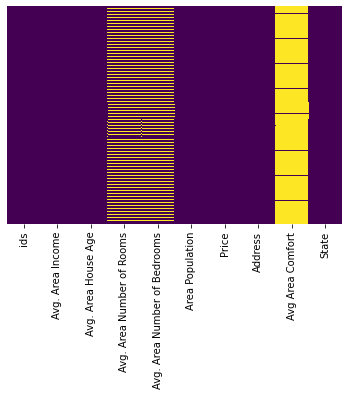

In [17]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [18]:
df.drop("Address", axis=1, inplace=True)

In [19]:
df.head()

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Avg Area Comfort,State
0,0,79545.458574,NaN,NaN,NaN,23086.800503,1.059034e+06,0.289937,NE
1,1,79248.642455,6.0028998082752425,6.730821019094919,3.09,40173.072174,1.505891e+06,NaN,CA
2,2,61287.067179,5.865889840310001,8.512727430375099,5.13,36882.159400,1.058988e+06,NaN,WI
3,3,63345.240046,7.1882360945186425,NaN,NaN,34310.242831,1.260617e+06,NaN,AP
4,4,59982.197226,5.040554523106283,7.839387785120487,4.23,26354.109472,6.309435e+05,NaN,AE


In [20]:
df["State"].value_counts()

AA    177
AP    170
AE    167
GU     91
OR     91
     ... 
KS     67
WI     67
IL     64
MD     62
VI     55
Name: State, Length: 62, dtype: int64

In [21]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df[["State"]] = oe.fit_transform(df[["State"]])

In [22]:
df.State

0       37.0
1        8.0
2       59.0
3        4.0
4        1.0
        ... 
4995     4.0
4996     0.0
4997    55.0
4998     1.0
4999    41.0
Name: State, Length: 5000, dtype: float64

In [23]:
df.head()

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Avg Area Comfort,State
0,0,79545.458574,NaN,NaN,NaN,23086.800503,1.059034e+06,0.289937,37.0
1,1,79248.642455,6.0028998082752425,6.730821019094919,3.09,40173.072174,1.505891e+06,NaN,8.0
2,2,61287.067179,5.865889840310001,8.512727430375099,5.13,36882.159400,1.058988e+06,NaN,59.0
3,3,63345.240046,7.1882360945186425,NaN,NaN,34310.242831,1.260617e+06,NaN,4.0
4,4,59982.197226,5.040554523106283,7.839387785120487,4.23,26354.109472,6.309435e+05,NaN,1.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ids                           5000 non-null   int64  
 1   Avg. Area Income              5000 non-null   float64
 2   Avg. Area House Age           4995 non-null   object 
 3   Avg. Area Number of Rooms     3333 non-null   object 
 4   Avg. Area Number of Bedrooms  3333 non-null   float64
 5   Area Population               5000 non-null   float64
 6   Price                         5000 non-null   float64
 7   Avg Area Comfort              200 non-null    float64
 8   State                         5000 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 351.7+ KB


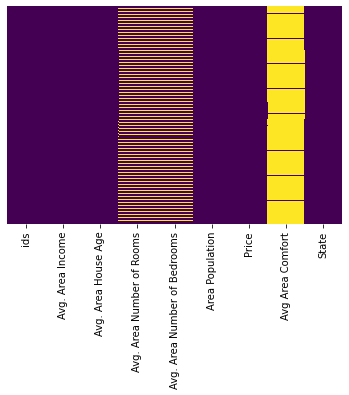

In [25]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [26]:
df.drop("Avg Area Comfort", axis=1, inplace=True)

In [27]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan, strategy="mean")
df.iloc[:, [3,4]] = si.fit_transform(df.iloc[:, [3,4]])

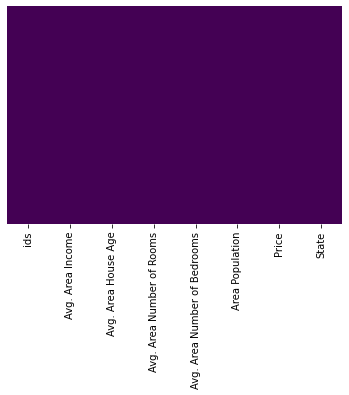

In [28]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ids                           5000 non-null   int64  
 1   Avg. Area Income              5000 non-null   float64
 2   Avg. Area House Age           4995 non-null   object 
 3   Avg. Area Number of Rooms     5000 non-null   float64
 4   Avg. Area Number of Bedrooms  5000 non-null   float64
 5   Area Population               5000 non-null   float64
 6   Price                         5000 non-null   float64
 7   State                         5000 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 312.6+ KB


In [57]:
df.dropna(inplace=True)

In [61]:
df["Avg. Area House Age"] = df["Avg. Area House Age"].astype(float)

In [62]:
x = df.drop(["ids", "Price"], axis=1)
y = df["Price"]

In [63]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4995 entries, 1 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4995 non-null   float64
 1   Avg. Area House Age           4995 non-null   float64
 2   Avg. Area Number of Rooms     4995 non-null   float64
 3   Avg. Area Number of Bedrooms  4995 non-null   float64
 4   Area Population               4995 non-null   float64
 5   State                         4995 non-null   float64
dtypes: float64(6)
memory usage: 273.2 KB


In [65]:
y.shape

(4995,)

In [66]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.3, random_state=1)

In [67]:
def mymodel(model):
  model.fit(xtrain, ytrain)
  ypred = model.predict(xtest)

  train = model.score(xtrain, ytrain)
  test = model.score(xtest, ytest)
  print(f"Training Accuracy = {train}")
  print(f"Testing Accuracy = {test}")

  mse = mean_squared_error(ytest, ypred)
  rmse = np.sqrt(mse)

  print(f"MSE : {mse}\nRMSE : {rmse}")

In [68]:
from sklearn.metrics import mean_squared_error, r2_score

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [70]:
mymodel(LinearRegression())

Training Accuracy = 0.8821635260384509
Testing Accuracy = 0.875537413464109
MSE : 15948549500.188505
RMSE : 126287.56668884117


In [71]:
mymodel(RandomForestRegressor())

Training Accuracy = 0.9778617087669614
Testing Accuracy = 0.8360792114176924
MSE : 21004696138.634296
RMSE : 144929.969773799


In [72]:
mymodel(SVR())

Training Accuracy = 0.00029055001610811537
Testing Accuracy = -0.0020859443569827274
MSE : 128406597772.35014
RMSE : 358338.66351867496


In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [75]:
mymodel(SVR())

Training Accuracy = 0.0005821131960349613
Testing Accuracy = -0.0018110420085084566
MSE : 128371371976.11383
RMSE : 358289.5086045834


In [76]:
mymodel(SVR(kernel = "linear"))

Training Accuracy = 0.013823985068040279
Testing Accuracy = 0.011365296932217883
MSE : 126682965044.551
RMSE : 355925.5049087533


In [77]:
parameters = {
    "kernel":["linear"],
    "C": [0.1, 1,10,100,1000,10000,100000]
}

In [78]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVR(), parameters, cv=5, verbose=3)

In [79]:
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END .............C=0.1, kernel=linear;, score=-0.001 total time=   0.3s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.001 total time=   0.3s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.001 total time=   0.3s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.001 total time=   0.3s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.001 total time=   0.3s
[CV 1/5] END ................C=1, kernel=linear;, score=0.009 total time=   0.3s
[CV 2/5] END ................C=1, kernel=linear;, score=0.011 total time=   0.3s
[CV 3/5] END ................C=1, kernel=linear;, score=0.011 total time=   0.3s
[CV 4/5] END ................C=1, kernel=linear;, score=0.011 total time=   0.3s
[CV 5/5] END ................C=1, kernel=linear;, score=0.011 total time=   0.3s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.105 total time=   0.3s
[CV 2/5] END ...............C=10, kernel=linear;,

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000, 100000],
                         'kernel': ['linear']},
             verbose=3)

In [80]:
grid.best_score_

0.8812677522155254

In [81]:
grid.best_params_

{'C': 10000, 'kernel': 'linear'}

In [82]:
grid.best_estimator_

SVR(C=10000, kernel='linear')

In [83]:
mymodel(grid.best_estimator_)

Training Accuracy = 0.8821396073949528
Testing Accuracy = 0.8755307887748632
MSE : 15949398383.272974
RMSE : 126290.92755725952


In [84]:
from sklearn.model_selection import cross_validate
cv = cross_validate(SVR(), x, y, cv=3)

In [85]:
cv

{'fit_time': array([0.69279051, 0.68853307, 0.67818403]),
 'score_time': array([0.32481456, 0.33476686, 0.32744169]),
 'test_score': array([-0.00088953,  0.00019184, -0.00220275])}

In [86]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4995 entries, 1 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4995 non-null   float64
 1   Avg. Area House Age           4995 non-null   float64
 2   Avg. Area Number of Rooms     4995 non-null   float64
 3   Avg. Area Number of Bedrooms  4995 non-null   float64
 4   Area Population               4995 non-null   float64
 5   State                         4995 non-null   float64
dtypes: float64(6)
memory usage: 273.2 KB


In [108]:
def newobs():
  aai = float(input("Enter the Avg. Area Income: "))
  aaha = float(input("Enter the Avg. Area House Age: "))
  aanr = float(input("Enter the Avg. Area number of Rooms: "))
  aabr = float(input("Enter the Avg. Area number of Bedrooms: "))
  ap = float(input("Enter the Area Population: "))
  st = float(input("Enter the State: "))

  ip = [aai, aaha, aanr, aabr, ap, st]
  svr = grid.best_estimator_
  svr.fit(xtrain, ytrain)
  yp = svr.predict([ip])[0]
  return yp

In [109]:
newobs()

Enter the Avg. Area Income: 60000
Enter the Avg. Area House Age: 10
Enter the Avg. Area number of Rooms: 5
Enter the Avg. Area number of Bedrooms: 4
Enter the Area Population: 15000
Enter the State: 5


16052796776.363153